# Bezmomentová skořepina I

## Zadání

U skořepiny podle obrázku proveďte napjatostní analýzu.

<img src="bezmomentova_skorepina1_.png" alt="bezmomentová skořepina" title="bezmomentová skořepina" width="400"/>

## Řešení

Načtení potřebných knihoven a iniciace kvalitního výpisu.

In [1]:
%matplotlib inline
from sympy import pi,init_printing,symbols,Integral,integrate,sin,cos,solveset,lambdify,sqrt,Rational
from numpy import linspace
from matplotlib.pyplot import subplots,xlabel,ylabel
import math as math

init_printing()

Zavedení potřebných symbolů.

In [2]:
rho,g=symbols('rho q')
h,phi,phi1,R,r0,r_theta,r_phi=symbols('h varphi varphi1 R r0 r_theta r_varphi')
N_phi,N_theta=symbols('N_varphi N_theta')

Tíhová síla $F_g$.

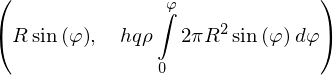

In [3]:
r0=R*sin(phi)
F_g=rho*g*h*Integral(2*pi*r0*R,[phi,0,phi])
r0,F_g

In [4]:
F_g=F_g.doit()
F_g

Silová rovnováha v ose $z$ a meridiánová síla $N_\varphi$.

In [5]:
eqn=2*pi*r0*N_phi*sin(phi)+F_g
eqn

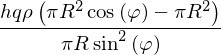

In [6]:
sol=solveset(eqn,N_phi)
N_phi_solved=sol.args[0]
N_phi_solved

Rovnice
\begin{equation}
 \frac{N_\varphi}{r_\varphi}+\frac{N_\theta}{r_\theta}=p
\end{equation}
a její řešení pro $N_\theta$ a $r_\varphi=r_\theta=R$ a
\begin{equation}
 p=-\frac{F_g\cos(\varphi)}{S}=-\rho gh\cos(\varphi).
\end{equation}

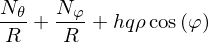

In [7]:
r_theta,r_phi=R,R
eqn=N_phi/r_phi+N_theta/r_theta+rho*g*h*cos(phi)
eqn

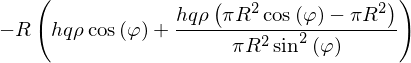

In [8]:
sol=solveset(eqn,N_theta)
N_theta_solved=sol.args[0].subs({N_phi:N_phi_solved})
N_theta_solved

Numerický příklad pro hodnoty,
\begin{eqnarray}
 R&=&1\;\mathrm{m}, \\
 h&=&20\;\mathrm{mm}, \\
 \alpha&=&\frac{\pi}{2}, \\
 g&=&10\;\mathrm{m}\times\mathrm{s}^{-2}, \\
 \rho&=&\;7200\;\mathrm{kg}\times\mathrm{m}^{-3}.
\end{eqnarray}

In [9]:
R_,h_,g_,rho_,alpha_=1,20.e-3,10,7200,math.pi/2

Pro meridiánové a tečné napětí platí,
\begin{equation}
 \sigma_\varphi=\frac{N_\varphi}{h}\quad a\quad\sigma_\theta=\frac{N_\theta}{h}.
\end{equation}

In [10]:
sigma_phi_=lambdify((phi,R,h,g,rho),N_phi_solved/h)
sigma_theta_=lambdify((phi,R,h,g,rho),N_theta_solved/h)
sigma_phi_,sigma_theta_

(<function _lambdifygenerated(varphi, R, h, q, rho)>,
 <function _lambdifygenerated(varphi, R, h, q, rho)>)

Vykreslení průběhů skožek napětí $\sigma_r$ a $\sigma_\varphi$.

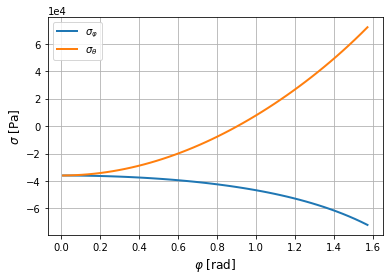

In [11]:
phi_=linspace(0.01,alpha_,50)
plot1=[sigma_phi_(ii,R_,h_,g_,rho_) for ii in phi_]
plot2=[sigma_theta_(ii,R_,h_,g_,rho_) for ii in phi_]

fig,ax=subplots()
ylabel(r'$\sigma$ [Pa]').set_fontsize(12)
xlabel(r'$\varphi$ [rad]').set_fontsize(12)
ax.ticklabel_format(style="sci",axis="y",scilimits=(0,0))
ax.plot(phi_,plot1,lw=2,label=r'$\sigma_{\varphi}$')
ax.plot(phi_,plot2,lw=2,label=r'$\sigma_{\theta}$')
ax.legend(loc='best')
ax.grid(True)